# Model: AdaBoost

## Load imports

In [14]:
# !pip install scikit-optimize

In [69]:
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.pipeline import Pipeline

# Models
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Scikit Optimize
from skopt.space import Integer, Real, Categorical
from skopt import BayesSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, balanced_accuracy_score

## Get Data

In [16]:
# read in the 
# need: X matrices and og datasets
with open('../data/train_vec.pkl','rb') as p_in:
    train = pickle.load(p_in)

In [17]:
with open('../data/test_vec.pkl', 'rb') as pickle_in:
    test = pickle.load(pickle_in)

In [21]:
train.head(3)

,id,cuisine,char_count,ingredient_count,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,0,144,9,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,1,155,11,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,2,172,12,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test.head(3)

,id,char_count,ingredient_count,baking powder,eggs,all-purpose flour,raisins,milk,white sugar,sugar,...,fraise,beef heart,lambs liver,soft cheese,sliced mango,pork strips,shark fillets,hash brown,porter,butter crackers
0,18009,80,6,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,28583,157,11,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,41580,82,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Set X and y

In [23]:
X_train = train.drop(columns=['cuisine', 'id']) 
X_test = test.drop(columns=['id'])

In [24]:
X_train.shape

(39774, 6849)

In [25]:
X_test.shape

(9944, 4502)

In [32]:
y_train = train['cuisine']

## Remove Addit. Train columns

In [27]:
remove_cols_list = set(X_train.columns) - set(X_test.columns)

In [30]:
X_train.drop(columns = remove_cols_list, inplace = True)

In [31]:
remove_cols_list = set(X_test.columns) - set(X_train.columns)

In [33]:
X_test.drop(columns = remove_cols_list, inplace = True)

In [36]:
X_train.shape[1] == X_test.shape[1]

True

In [49]:
X_train.shape

(39774, 4047)

## Create Pipeline with StandardScaler() and a Random Forest Model

In [52]:
pipe= Pipeline([
    ('sc', StandardScaler()),
    ('model', RandomForestClassifier())
])

## BayesSearch

In [56]:
params = {
    'model__ccp_alpha': Real(1e-5, 1e+2, prior='log-uniform'),
    'model__n_estimators': Integer(100, 500),
    'model__max_depth': Integer(1, 4047),
    'model__max_features': Integer(1, 4047)
}

In [57]:
bs = BayesSearchCV(estimator = pipe,
                     search_spaces = params,
                     scoring = 'f1_weighted',
                     n_iter = 10,
                     cv = 3,
                     verbose = 1, n_jobs=-1,
                     random_state=42)

In [58]:
bs.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('sc', StandardScaler()),
                                        ('model', RandomForestClassifier())]),
              n_iter=10, n_jobs=-1, random_state=42, scoring='f1_weighted',
              search_spaces={'model__ccp_alpha': Real(low=1e-05, high=100.0, prior='log-uniform', transform='normalize'),
                             'model__max_depth': Integer(low=1, high=4047, prior='uniform', transform='normalize'),
                             'model__max_features': Integer(low=1, high=4047, prior='uniform', transform='normalize'),
                             'model__n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')},
              verbose=1)

In [61]:
with open('../data/model.pkl', 'wb') as pickle_out:
    pickle.dump(bs, pickle_out)

## plot performance

In [76]:
labels =['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french', 'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean', 'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican', 'russian', 'brazilian']

In [79]:
dict(zip(labels, range(len(labels))))

{'italian': 0,
 'mexican': 1,
 'southern_us': 2,
 'indian': 3,
 'chinese': 4,
 'french': 5,
 'cajun_creole': 6,
 'thai': 7,
 'japanese': 8,
 'greek': 9,
 'spanish': 10,
 'korean': 11,
 'vietnamese': 12,
 'moroccan': 13,
 'british': 14,
 'filipino': 15,
 'irish': 16,
 'jamaican': 17,
 'russian': 18,
 'brazilian': 19}

/Users/kaitcrawford/opt/anaconda3/envs/cwk/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x1000 with 0 Axes>

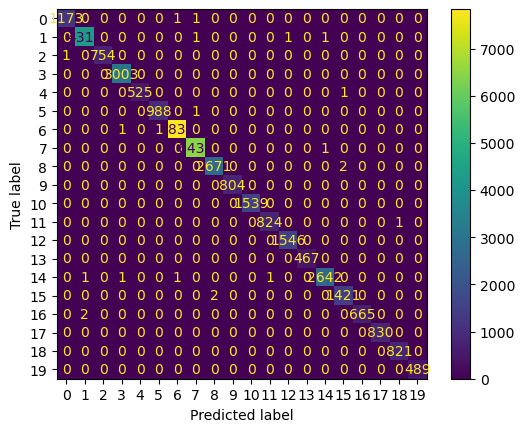

In [82]:
plt.figure(figsize=(20,10))
plot_confusion_matrix(bs, X_train, y_train, cmap='viridis');

/Users/kaitcrawford/opt/anaconda3/envs/cwk/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/kaitcrawford/opt/anaconda3/envs/cwk/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/kaitcrawford/opt/anaconda3/envs/cwk/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they wer

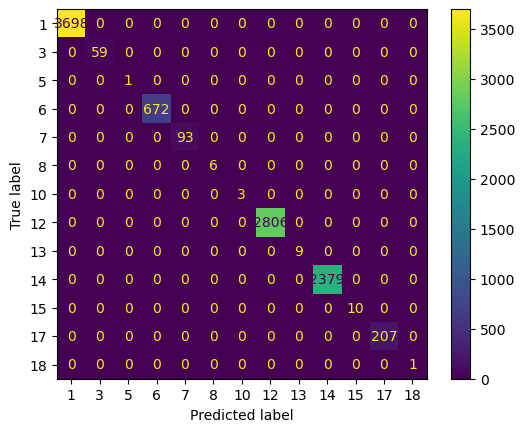

In [64]:
plot_confusion_matrix(bs, X_test, bs.predict(X_test));